In [46]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('ams16.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,GBC
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,GBC
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,GBC
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,GBC
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,GBC


In [48]:
len(df)

18447

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18447 non-null  int64  
 1   N_Person           18447 non-null  int64  
 2   Xcenter            18447 non-null  float64
 3   Ycenter            18447 non-null  float64
 4   PerXmin            18447 non-null  float64
 5   PerYmin            18447 non-null  float64
 6   PerXmax            18447 non-null  float64
 7   PerYmax            18447 non-null  float64
 8   N_Handgun          18447 non-null  int64  
 9   HgXcenter          18447 non-null  float64
 10  HgYcenter          18447 non-null  float64
 11  HgXmin             18447 non-null  float64
 12  HgYmin             18447 non-null  float64
 13  HgXmax             18447 non-null  float64
 14  HgYmax             18447 non-null  float64
 15  Intersection       18447 non-null  object 
 16  Included_Center    184

In [50]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14203
Ycenter              14184
PerXmin              14211
PerYmin              14208
PerXmax              14211
PerYmax              14188
N_Handgun                5
HgXcenter             7302
HgYcenter             7300
HgXmin                7304
HgYmin                7304
HgXmax                7304
HgYmax                7303
Intersection             9
Included_Center          2
Intersection_Area     8413
Hg_Area               7304
Distance             18447
Ground_Truth             2
GT                       2
dtype: int64

In [51]:
df['Ground_Truth'].value_counts()

1    17911
0      536
Name: Ground_Truth, dtype: int64

In [52]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,GBC,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,GBC,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,GBC,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,GBC,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,GBC,1,0,0,0,0,0,0,0,0


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18447 non-null  int64  
 1   N_Person                      18447 non-null  int64  
 2   Xcenter                       18447 non-null  float64
 3   Ycenter                       18447 non-null  float64
 4   PerXmin                       18447 non-null  float64
 5   PerYmin                       18447 non-null  float64
 6   PerXmax                       18447 non-null  float64
 7   PerYmax                       18447 non-null  float64
 8   N_Handgun                     18447 non-null  int64  
 9   HgXcenter                     18447 non-null  float64
 10  HgYcenter                     18447 non-null  float64
 11  HgXmin                        18447 non-null  float64
 12  HgYmin                        18447 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [54]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'GBC', 0: 'RFC'}


In [55]:
print(df2['Ground_Truth'].value_counts())

1    17911
0      536
Name: Ground_Truth, dtype: int64


In [56]:
df3 = df2.drop(columns=["GT"])

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18447 non-null  int64  
 1   N_Person                      18447 non-null  int64  
 2   Xcenter                       18447 non-null  float64
 3   Ycenter                       18447 non-null  float64
 4   PerXmin                       18447 non-null  float64
 5   PerYmin                       18447 non-null  float64
 6   PerXmax                       18447 non-null  float64
 7   PerYmax                       18447 non-null  float64
 8   N_Handgun                     18447 non-null  int64  
 9   HgXcenter                     18447 non-null  float64
 10  HgYcenter                     18447 non-null  float64
 11  HgXmin                        18447 non-null  float64
 12  HgYmin                        18447 non-null  float64
 13  H

In [58]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14757, 28) (14757,)
(3690, 28) (3690,)


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9874937120971987
mean_test =  0.9863793578613752


,fit_time,score_time,test_score,train_score
0,0.148583,0.003988,0.989160,0.988555
1,0.162565,0.003991,0.985095,0.987953
2,0.150595,0.005985,0.987805,0.987426
3,0.160173,0.007969,0.985772,0.987200
4,0.145636,0.003967,0.985772,0.987049
5,0.150161,0.005088,0.983740,0.988706
6,0.137962,0.004984,0.987127,0.987953
7,0.135634,0.004987,0.986441,0.987201
8,0.144892,0.003989,0.986441,0.986523
9,0.149699,0.003989,0.986441,0.986373


                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
15               Included_Center    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
1                       N_Person    0.000000  0.000000
19      Intersection_Center_left    0.011273  0.026855
11                        HgXmin    0.011452  0.015285
7                        PerYmax    0.014423  0.019417
17                       Hg_Area    0.014584  0.035197
24  Intersection_No_intersection    0.014693  0.031967
2                        Xcenter    0.014761  0.030425
23           Intersection_Inside    0.015687  0.042519
4                        PerXmin    0.024067  0.042493
6                        PerXmax    0.034503  0.083138
13        

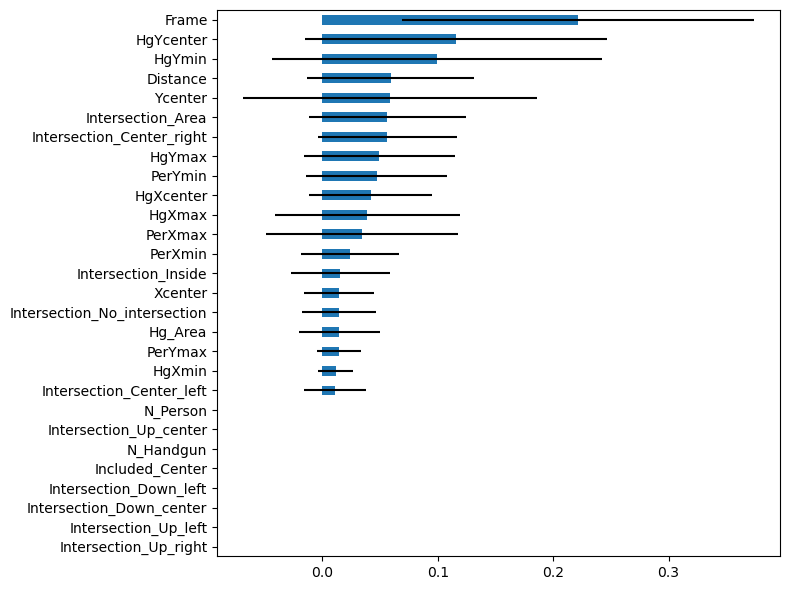

In [61]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       104
           1       0.99      1.00      0.99      3586

    accuracy                           0.99      3690
   macro avg       0.92      0.84      0.88      3690
weighted avg       0.99      0.99      0.99      3690



In [63]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions))

Score train =  0.9878048780487805


In [64]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='macro')

0.9190911315982704

In [65]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions, average='macro')

0.8443412415805054

In [66]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.8778234698134573

In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18447 non-null  int64  
 1   N_Person                      18447 non-null  int64  
 2   Xcenter                       18447 non-null  float64
 3   Ycenter                       18447 non-null  float64
 4   PerXmin                       18447 non-null  float64
 5   PerYmin                       18447 non-null  float64
 6   PerXmax                       18447 non-null  float64
 7   PerYmax                       18447 non-null  float64
 8   N_Handgun                     18447 non-null  int64  
 9   HgXcenter                     18447 non-null  float64
 10  HgYcenter                     18447 non-null  float64
 11  HgXmin                        18447 non-null  float64
 12  HgYmin                        18447 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86956352, -1.00555701,  0.38531151, -1.05921327,  0.40701498,
        -0.80142004,  0.34796155, -1.43117415, -0.49785505,  0.64741793,
        -1.26000303,  0.70030692, -1.17819608,  0.59314201, -1.33715767,
         1.17746191, -0.05248719, -0.63178191, -0.69913501,  2.66619043,
        -0.28077575, -0.01803779, -0.010413  , -0.53994017, -1.08816856,
        -0.12003116, -0.06171798, -0.13265401],
       [-1.86739153, -1.00555701,  0.38502615, -1.05862322,  0.40603424,
        -0.79973294,  0.34840662, -1.43392466, -0.49785505,  0.64582561,
        -1.26085692,  0.69730991, -1.17884698,  0.59294144, -1.33821659,
         1.17746191, -0.05007777, -0.62590981, -0.69770697,  2.66619043,
        -0.28077575, -0.01803779, -0.010413  , -0.53994017, -1.08816856,
        -0.12003116, -0.06171798, -0.13265401],
       [-1.86521955, -1.00555701,  0.38564586, -1.06077595,  0.40750112,
        -0.80378268,  0.34812594, -1.4299105 , -0.49785505,  0.64564733,
        -1.26227066,  0.6972

In [22]:
print(scaler.mean_)

[8.60762292e+02 8.79655228e-01 3.93161312e+02 3.82498977e+02
 3.05759356e+02 2.46173151e+02 4.80563268e+02 5.18824803e+02
 2.99398276e-01 3.10692183e+02 3.12578882e+02 2.87292550e+02
 2.93009305e+02 3.34091816e+02 3.32148459e+02 4.19038326e-01
 9.32664492e+02 2.03117379e+03 2.32243763e+02 1.23326286e-01
 7.30742126e-02 3.25256139e-04 1.08418713e-04 2.25727761e-01
 5.42147775e-01 1.42028514e-02 3.79465496e-03 1.72927847e-02]


In [23]:
print(scaler.scale_)

[4.60408156e+02 8.74793987e-01 2.12394744e+02 6.88398006e+01
 2.20183283e+02 1.12014201e+02 2.12834959e+02 3.91717772e+01
 6.01376392e-01 1.53208307e+02 9.72465311e+01 1.52464326e+02
 9.92141547e+01 1.54444948e+02 9.58511636e+01 4.93401669e-01
 1.67163262e+03 1.81971903e+03 1.37488281e+02 3.28811364e-01
 2.60258280e-01 1.80319258e-02 1.04118662e-02 4.18060688e-01
 4.98220398e-01 1.18326372e-01 6.14837828e-02 1.30360057e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13835, 28)

In [26]:
y_train.value_counts()

1    13433
0      402
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4612, 28)

In [28]:
y_test.value_counts()

1    4478
0     134
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[0.00000000e+00, 1.00000000e+00],
       [3.62598840e-13, 1.00000000e+00],
       [3.49720253e-13, 1.00000000e+00],
       ...,
       [2.22044605e-16, 1.00000000e+00],
       [4.36250533e-04, 9.99563749e-01],
       [2.24267830e-07, 9.99999776e-01]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       134
           1       0.99      1.00      1.00      4478

    accuracy                           0.99      4612
   macro avg       0.93      0.90      0.91      4612
weighted avg       0.99      0.99      0.99      4612



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9927719551861222
Score test =  0.9904596704249783


In [40]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions_mlp))

Score train =  0.9904596704249783


In [41]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_mlp, average='macro')

0.9284435915128515

In [42]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_mlp, average='macro')

0.897355562517915

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions_mlp, average='macro')

0.9122749681397597

In [34]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 